In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv(r"C:\Users\saisr\Downloads\Paysim\paysim.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.shape

(6362620, 11)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df = df.dropna()
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df["isFraud"].value_counts(normalize=True) * 100


isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

In [11]:
df["type"].value_counts()


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [12]:
fraud_by_type = df.groupby("type")["isFraud"].mean()
fraud_by_type


type
CASH_IN     0.000000
CASH_OUT    0.001840
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.007688
Name: isFraud, dtype: float64

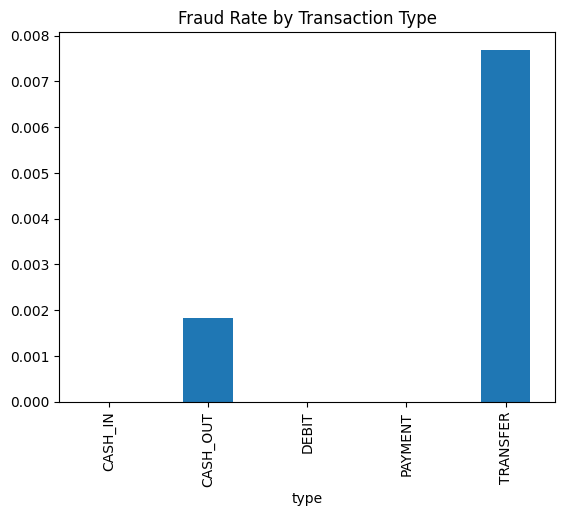

In [13]:
fraud_by_type.plot(kind="bar")
plt.title("Fraud Rate by Transaction Type")
plt.show()


Fraud mostly happens in:

TRANSFER

CASH_OUT

Almost none in:

CASH_IN

PAYMENT

In [14]:
df["amount"].describe()


count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

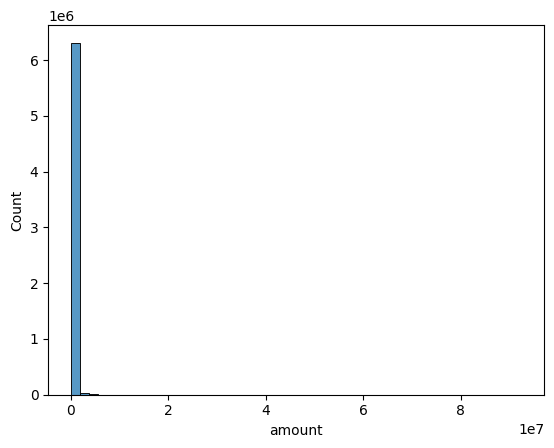

In [14]:
sns.histplot(df["amount"], bins=50)
plt.show()


This step is all about understanding the "money" involved. When you analyze the `amount` column, you are looking for the financial behavior of both normal users and thieves.

### 1. Breaking down `df["amount"].describe()`

This command gives you a statistical "snapshot." Here is what the key terms mean in plain English:

* **Mean:** The average transaction. (Calculated by: Total money  Total transactions).
* **Median (50%):** The "middle" value. If you lined up every transaction from smallest to largest, this is the one right in the center.
* **Max:** The single largest transaction in the entire dataset.

**The "Red Flag" Signal:**
If the **Mean** is much higher than the **Median**, it’s a classic sign of **skewness**. It means a few massive transactions are pulling the average up, even though most people are spending much smaller amounts.

---

### 2. Understanding the Histogram

When you run the `sns.histplot` code, you are turning those numbers into a shape.

* **The "Wall" on the left:** You will likely see a huge, tall bar near . This shows that the vast majority of transactions are small (like buying a coffee).
* **The "Long Tail" on the right:** You will see a thin line stretching far to the right. This represents those rare, massive transfers.

---

### 3. Why "Right-Skewed" Matters for Fraud

In data science, **outliers** (the extreme values in that long tail) are often where the interesting stuff happens.

* **Normal Behavior:** Most people have a "budget." Their transactions stay within a predictable range.
* **Fraud Behavior:** Thieves often try to "drain" an account quickly with a huge transfer, or they might do the opposite—testing the card with a tiny  transaction.

### 4. What is a "Bin"?

In your code, `bins=50` tells the computer to divide the range of money into 50 "buckets."

* If you have too few bins (e.g., `bins=2`), you just get two giant blocks.
* If you have too many, the chart looks like a comb. **50** is usually the "Goldilocks" number for seeing the shape clearly.

---

**Would you like me to show you how to "zoom in" on the histogram so you can see the small transactions more clearly without the large ones squishing the graph?**

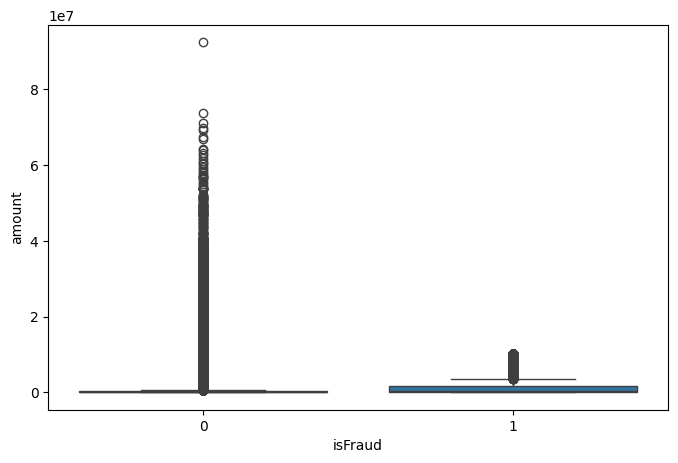

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x="isFraud", y="amount", data=df)
plt.show()

In [15]:
df["balance_mismatch"] = (
    df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"]
).astype(int)


In [16]:
pd.crosstab(df["balance_mismatch"], df["isFraud"])


isFraud,0,1
balance_mismatch,,
0,940537,8086
1,5413870,127


In [17]:
pd.crosstab(df["isFlaggedFraud"], df["isFraud"])


isFraud,0,1
isFlaggedFraud,,
0,6354407,8197
1,0,16


In [21]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_mismatch
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0


In [18]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(df["isFraud"], df["isFlaggedFraud"])
recall = recall_score(df["isFraud"], df["isFlaggedFraud"])

print("System Precision:", precision)
print("System Recall:", recall)


System Precision: 1.0
System Recall: 0.0019481310118105442


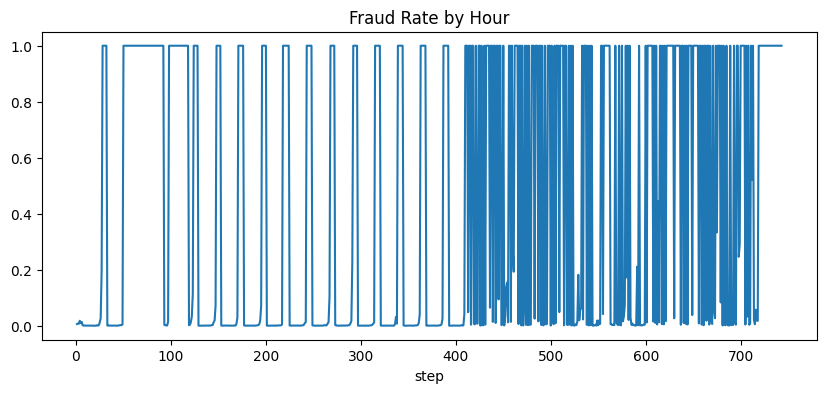

In [19]:
df.groupby("step")["isFraud"].mean().plot(figsize=(10,4))
plt.title("Fraud Rate by Hour")
plt.show()


In [22]:
threshold = df["amount"].quantile(0.99)
threshold


np.float64(1615979.4715999917)

In [23]:
df["high_amount_flag"] = (df["amount"] > threshold).astype(int)


In [24]:
pd.crosstab(df["high_amount_flag"], df["isFraud"])


isFraud,0,1
high_amount_flag,,
0,6292749,6244
1,61658,1969


HIGH-RISK TRANSACTION TYPE

In [25]:
df["type_risk_flag"] = df["type"].isin(["TRANSFER", "CASH_OUT"]).astype(int)


In [26]:
pd.crosstab(df["type_risk_flag"], df["isFraud"])


isFraud,0,1
type_risk_flag,,
0,3592211,0
1,2762196,8213


HIGH FREQUENCY CUSTOMER

In [27]:
txn_count = df["nameOrig"].value_counts()
df["txn_count"] = df["nameOrig"].map(txn_count)


In [28]:
df["high_freq_flag"] = (df["txn_count"] > 20).astype(int)


In [29]:
pd.crosstab(df["high_freq_flag"], df["isFraud"])


isFraud,0,1
high_freq_flag,,
0,6354407,8213


BUILD SIMPLE RISK SCORE

In [30]:
df["risk_score"] = (
    df["balance_mismatch"] * 3 +
    df["high_amount_flag"] * 2 +
    df["type_risk_flag"] * 2 +
    df["high_freq_flag"] * 1
)


In [31]:
df["high_risk"] = (df["risk_score"] >= 4).astype(int)


In [32]:
pd.crosstab(df["high_risk"], df["isFraud"])


isFraud,0,1
high_risk,,
0,3758213,6211
1,2596194,2002


EVALUATE MODEL

In [33]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(df["isFraud"], df["high_risk"])
recall = recall_score(df["isFraud"], df["high_risk"])

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.0007705346324911593
Recall: 0.24375989285279434


In [34]:
sys_precision = precision_score(df["isFraud"], df["isFlaggedFraud"])
sys_recall = recall_score(df["isFraud"], df["isFlaggedFraud"])

print("System Precision:", sys_precision)
print("System Recall:", sys_recall)


System Precision: 1.0
System Recall: 0.0019481310118105442


In [36]:
pd.crosstab(df["type_risk_flag"], df["isFraud"])


isFraud,0,1
type_risk_flag,,
0,3592211,0
1,2762196,8213


In [51]:
!pip install sqlalchemy



  Using cached sqlalchemy-2.0.46-cp312-cp312-win_amd64.whl.metadata (9.8 kB)
  Using cached greenlet-3.3.1-cp312-cp312-win_amd64.whl.metadata (3.8 kB)
Using cached sqlalchemy-2.0.46-cp312-cp312-win_amd64.whl (2.1 MB)
Using cached greenlet-3.3.1-cp312-cp312-win_amd64.whl (227 kB)

   ---------------------------------------- 0/2 [greenlet]
   ---------------------------------------- 0/2 [greenlet]
   ---------------------------------------- 0/2 [greenlet]
   ---------------------------------------- 0/2 [greenlet]
   ---------------------------------------- 0/2 [greenlet]
   ---------------------------------------- 0/2 [greenlet]
   -------------------- ------------------- 1/2 [sqlalchemy]
   -------------------- ------------------- 1/2 [sqlalchemy]
   -------------------- ------------------- 1/2 [sqlalchemy]
   -------------------- ------------------- 1/2 [sqlalchemy]
   -------------------- ------------------- 1/2 [sqlalchemy]
   -------------------- ------------------- 1/2 [sqlalchemy]


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from sqlalchemy.engine import URL
from sqlalchemy import create_engine

connection_url = URL.create(
    "mysql+pymysql",
    username="root",
    password="Srikar@2000",   # your real password
    host="localhost",
    port=3306,               # default MySQL port
    database="audit_db"
)

engine = create_engine(connection_url)


In [36]:
with engine.connect() as conn:
    print("Connection successful!")


Connection successful!


In [37]:
df.to_sql("transactions", engine, if_exists="replace", index=False)


6362620

In [38]:
df_sample = df.sample(300000, random_state=42)
df_sample.to_sql("transactions", engine, if_exists="replace", index=False)


300000

In [39]:
import pandas as pd

df_sql = pd.read_sql("SELECT * FROM transactions", engine)

df_sql.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_mismatch,high_amount_flag,type_risk_flag,txn_count,high_freq_flag,risk_score,high_risk
0,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0,1,0,0,1,0,3,0
1,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0,0,0,0,1,0,0,0
2,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0,1,0,0,1,0,3,0
3,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0,1,0,1,1,0,5,1
4,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0,1,0,0,1,0,3,0


In [40]:
df_sql.to_csv("dashboard_data.csv", index=False)
